<a href="https://colab.research.google.com/github/Kasaligan/Machine-Learning-UNS/blob/main/Clase_2_Ejercicio_2_DIstribuciones_normales_y_curva_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo modulos necesarios.

In [ ]:
import numpy as np
import pandas as pd
import math

Genero las distribuciones gaussianas.

In [ ]:
Muestras=50
Media_1 = 10 
desvio_1 = 3
Media_2 = 15 
desvio_2 = 5

A = np.random.normal(Media_1,desvio_1,Muestras)
B = np.random.normal(Media_2,desvio_2,Muestras)

#print("Distribucion A = " , A, "\n")
#print("Distribucion B = " , B)

Genero vectores con las etiquetas "A" y "B" para concatenar con los anteriores. Esto ayudara a la hora de hacer la curva ROC.

In [ ]:
Avect=["A"]*len(A)
Bvect=["B"]*len(B)

Concateno los vectores de dimensiones similares en un array de Nx2, donde N es la cantidad de elementos de las listas.

In [ ]:
A_labeled_data=np.column_stack((A,Avect))
#print(A_labeled_data,"\n")
B_labeled_data=np.column_stack((B,Bvect))
#print(B_labeled_data)

Concateno los vectores como columnas

In [ ]:
Valores_etiquetados = np.concatenate((A_labeled_data,B_labeled_data),axis=0)
print(Valores_etiquetados)


[['9.895287154477177' 'A']
 ['9.067245850271503' 'A']
 ['13.375422634718838' 'A']
 ['16.330297218565974' 'A']
 ['12.609842118170839' 'A']
 ['9.288005031180932' 'A']
 ['12.225502959724428' 'A']
 ['7.762625500946272' 'A']
 ['11.472127736288448' 'A']
 ['9.49953383991692' 'A']
 ['10.27549746867205' 'A']
 ['9.711535270316782' 'A']
 ['10.222406998346138' 'A']
 ['9.4535021653287' 'A']
 ['11.601786330302057' 'A']
 ['7.8848920365479715' 'A']
 ['13.120256991613163' 'A']
 ['11.371172461158915' 'A']
 ['11.30940420631891' 'A']
 ['8.348800997541133' 'A']
 ['9.852912936183326' 'A']
 ['10.950586848094979' 'A']
 ['3.2401692646211337' 'A']
 ['4.414445457675027' 'A']
 ['9.916465633321517' 'A']
 ['7.839865010274284' 'A']
 ['14.338473806045242' 'A']
 ['10.230697013927498' 'A']
 ['10.194899325746464' 'A']
 ['11.183793640314235' 'A']
 ['9.375079289089998' 'A']
 ['9.789586289071819' 'A']
 ['9.357623522596413' 'A']
 ['10.991008243256358' 'A']
 ['6.676775061247861' 'A']
 ['5.435592888477602' 'A']
 ['10.34916400

Al concatenar los valores de las celdas se convierten en tipo "string". Confirmo que la primera columna es tipo string y luego la convierto en tipo numerico para poder organizar de menor a mayor la lista. Al organizar muevo las etiquetas junto a los valores.

In [ ]:
#Genero un dataframe con los valores etiquetados, pues es mas facil de trabajar.
Valores_etiquetados_df = pd.DataFrame(Valores_etiquetados,columns=["Valor", "Etiqueta"])

#Convierto los valores de la columnda "Valor" en tipo numerico, la funcion determina el tipo mas adecuado.
Valores_etiquetados_df.loc[:,"Valor"] = pd.to_numeric(Valores_etiquetados_df.loc[:,"Valor"])

type(Valores_etiquetados_df.loc[0,"Valor"]) #Confirmo la conversion

#Ordeno el dataframe segun la columna "Valor"
Org_creciente = Valores_etiquetados_df.sort_values("Valor")
print(Org_creciente)

        Valor Etiqueta
22   3.240169        A
43   4.234496        A
23   4.414445        A
35   5.435593        A
54   5.975673        B
..        ...      ...
97  20.501953        B
74  20.553765        B
89  20.991710        B
67  21.159629        B
90  27.216770        B

[100 rows x 2 columns]


Reseteo los indices de las filas, pues al ordenarlos reordena tambien los valores de los indices.


In [ ]:
Org_creciente=Org_creciente.reset_index(drop=True) #drop=True elimina los indices anteriores, sino pasan a ser una columna extra
print(Org_creciente)


        Valor Etiqueta
0    3.240169        A
1    4.234496        A
2    4.414445        A
3    5.435593        A
4    5.975673        B
..        ...      ...
95  20.501953        B
96  20.553765        B
97  20.991710        B
98  21.159629        B
99  27.216770        B

[100 rows x 2 columns]


Creo el vector para generar la curva ROC (no normalizado)



In [ ]:
#Para esta parte solo necesito las etiquetas, no los valores en si. Guardo un dataframe con las etiquetas.
Etiqueta_ordenado=Org_creciente.loc[:,"Etiqueta"]

#Creo un vector donde guardar el crecimiento de la curva ROC segun el orden de las etiquetas
Crecimiento_ROC=pd.DataFrame();


#Bucle para procesar los crecimientos
for i in range(0,len(Org_creciente.loc[:,"Etiqueta"])):

#A continuacion segun la etiqueta del vector se crea un dataframe con el paso que debe realizarse en el grafico de la curva ROC. Consideramos "A" como el caso verdadero
  if Org_creciente.loc[i,"Etiqueta"]=="A":
    agregar=pd.DataFrame( {"x":[0],"y":[1],"Valor":Org_creciente.loc[i,"Valor"]} )   #De esta forma se crean los vectores con etiquetas de columna, que seran las coordenadas del grafico.

  elif Org_creciente.loc[i,"Etiqueta"]=="B":
    agregar=pd.DataFrame( {"x":[1],"y":[0],"Valor":Org_creciente.loc[i,"Valor"]} )

  Crecimiento_ROC = Crecimiento_ROC.append(agregar) #Agrego los segmentos al dataframe

print(Crecimiento_ROC)
type(Crecimiento_ROC)


    x  y      Valor
0   0  1   3.240169
0   0  1   4.234496
0   0  1   4.414445
0   0  1   5.435593
0   1  0   5.975673
.. .. ..        ...
0   1  0  20.501953
0   1  0  20.553765
0   1  0  20.991710
0   1  0  21.159629
0   1  0  27.216770

[100 rows x 3 columns]


pandas.core.frame.DataFrame

Noto que los indices de las filas se pasaron a cero (pasa siempre que se agrega algo con append, se conserva el indice de lo que se agrego), los reseteo y continuo asignando los puntos.

---



In [ ]:
#Reseteo indices de las filas
Crecimiento_ROC=Crecimiento_ROC.reset_index(drop=True)
#print(Crecimiento_ROC)
#Creo un vector donde guardar los puntos que seran graficados
Puntos_ROC=pd.DataFrame();

#Bucle para generar los puntos a graficar
for i in range(0,len(Crecimiento_ROC)):
  if (i==0):
    Puntos_ROC=Puntos_ROC.append( Crecimiento_ROC.loc[i,:] )  #Si es la primera iteracion, asigno el primer valor del crecimiento
  else:
    a=Crecimiento_ROC.loc[i,"x"]+Puntos_ROC.loc[i-1,"x"]    #Para el resto de las iteraciones sumo el valor anterior del punto al valor del crecimiento actual
    b=Crecimiento_ROC.loc[i,"y"]+Puntos_ROC.loc[i-1,"y"]  
    agregar=pd.DataFrame({"x":[a],"y":[b],"Valor":Crecimiento_ROC.loc[i,"Valor"]},index=[i]) #fila para agregar al dataframe, con las mismas etiquetas
                                                      #es importante aclarar el indice con el que quiero que se agreguen los datos, pues lo utilizo
                                                      #para el calculo 
    Puntos_ROC=Puntos_ROC.append(agregar) #agrego la fila
    #print(Puntos_ROC)

#Como agregue con append, reseteo indices
Puntos_ROC=Puntos_ROC.reset_index(drop=True)
print(Puntos_ROC) 


        Valor     x     y
0    3.240169   0.0   1.0
1    4.234496   0.0   2.0
2    4.414445   0.0   3.0
3    5.435593   0.0   4.0
4    5.975673   1.0   4.0
..        ...   ...   ...
95  20.501953  46.0  50.0
96  20.553765  47.0  50.0
97  20.991710  48.0  50.0
98  21.159629  49.0  50.0
99  27.216770  50.0  50.0

[100 rows x 3 columns]


Ploteo la curva ROC xq puedo y quiero 

(array([0., 0., 0., 0., 0., 1., 3., 2., 1., 3., 0., 3., 9., 3., 2., 5., 6.,
        4., 0., 1., 5., 1., 0., 0., 0., 0., 0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 27 Patch objects>)

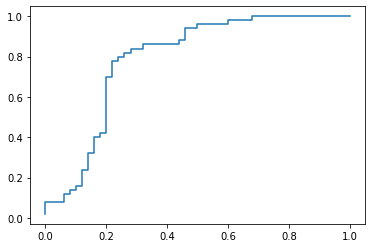

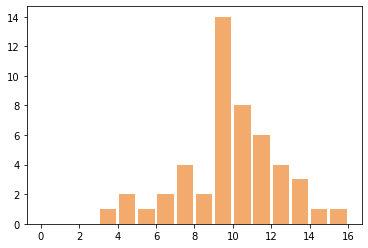

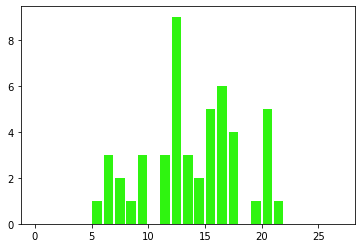

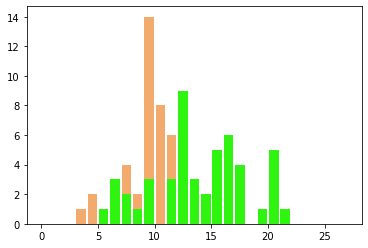

In [ ]:
#Importo el modulo pyplot
import matplotlib.pyplot as plt

#Ploteo y divido por la cantidad de elementos para normalizar la curva
Xsize=A.size  #Recordemos que la variable "x" corresponde a los casos en "A"
Ysize=B.size  #Recordemos que la variable "y" corresponde a los casos en "B"

plt.plot(Puntos_ROC.loc[:,"x"]/Xsize, Puntos_ROC.loc[:,"y"]/Ysize)

#De onda van tambien los histogramas
plt.figure()
plt.hist(x=A, bins=range(0,round(max(A)+1)), color='#F2AB6D', rwidth=0.85,)
plt.figure()
plt.hist(x=B, bins=range(0,round(max(B)+1)), color='#2ff410', rwidth=0.85,)
plt.figure()
plt.hist(x=A, bins=range(0,round(max(A)+1)), color='#F2AB6D', rwidth=0.85,)
plt.hist(x=B, bins=range(0,round(max(B)+1)), color='#2ff410', rwidth=0.85,)




Preparo un codigo que mida la distancia desde cada punto de la curva ROC hasta la recta identidad. El codigo se queda con el maximo valor de esta distancia y el valor del punto que la genero. La distancia se calcula con los valores NO NORMALIZADOS, por lo que la distancia maxima puede ser bastante grande.
Los pasos para encontrar esta distancia son:

1- Generar una recta perpendicular a la identidad que pase por el punto evaluado.

2- Identificar el punto de la recta que pertenece a la identidad. 

3- Hallar el modulo vector distancia entre dos puntos usando pitagoras.

In [ ]:
#Importo modulo MATH pues... voy a usar matematica
import math

#Inicializo variable para guardar la distancia maxima
Dist_MAX=0;

for i in range(1,len(Puntos_ROC.iloc[:,1])):
  m = -1  #pendiente perpendicular a la identidad
  X0= Puntos_ROC.loc[i,"x"] #punto evaluado X 
  Y0= Puntos_ROC.loc[i,"y"] #punto evaluado Y
  Y1 = (-m*X0+Y0)/(1-m)   #Valor de la recta identidad que se corresponde a la recta construida
  X1=Y1    #Valor X1=Y1 por ser la recta identidad
  Distancia=math.sqrt((X1-X0)**2+(Y1-Y0)**2)  #Calculo de la distancia
  if (Distancia>Dist_MAX):  #Si es mayor a la distancia maxima anterior, se guardan los datos del punto
    Dist_MAX=Distancia
    Xmax=X0
    Ymax=Y0
    Valor_dist_MAX=Puntos_ROC.loc[i,"Valor"]

#Se muestran los valores de interes para el clasificador, en particular el Valor de corte
print("Maxima distancia: ",Dist_MAX,"\nPunto: (", Xmax ,", " , Ymax , ")\nValor de corte: " , Valor_dist_MAX)



Maxima distancia:  19.79898987322333 
Punto: ( 11.0 ,  39.0 )
Valor de corte:  11.601786330302055
